In [1]:
import matplotlib.pyplot as plt
import scipy.signal as s_sig
import numpy as np
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

In [2]:
x = np.linspace(0, 1, 1000000)
carr_freq = 10000
ts = 2*np.pi * carr_freq * x
carr_amp = 10
carr_sig = carr_amp * np.cos(ts)
carr_amp2 = 1
carr_sig2 = carr_amp2 * np.cos(ts)
carr_amp3 = 100
carr_sig3 = carr_amp3 * np.cos(ts)

m_freq = 440
m_amp = 1
ts = 2*np.pi * m_freq * x
m_sig = m_amp * np.cos(ts)

#Амлитудная модуляция

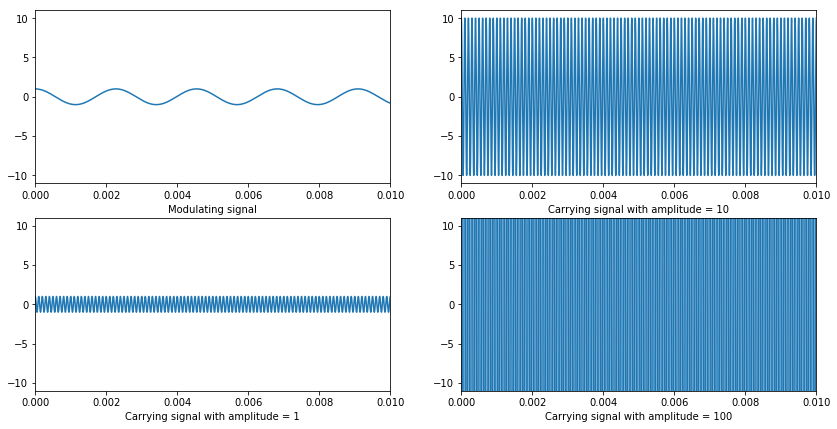

In [36]:
plt.rcParams["figure.figsize"] = [14, 7]
plt.subplot(221)
plt.axis([0, 0.01, -11, 11])
plt.xlabel('Modulating signal')
plt.plot(x, m_sig)
plt.subplot(222)
plt.axis([0, 0.01, -11, 11])
plt.xlabel('{0:10}{1:0.0f}'.format('Carrying signal with amplitude = ', carr_amp))
plt.plot(x, carr_sig)
plt.subplot(223)
plt.axis([0, 0.01, -11, 11])
plt.xlabel('{0:10}{1:0.0f}'.format('Carrying signal with amplitude = ', carr_amp2))
plt.plot(x, carr_sig2)
plt.subplot(224)
plt.axis([0, 0.01, -11, 11])
plt.xlabel('{0:10}{1:0.0f}'.format('Carrying signal with amplitude = ', carr_amp3))
plt.plot(x, carr_sig3)

for M = 0.10    eta = 0.498
for M = 1.00    eta = 33.333
for M = 0.01    eta = 0.005


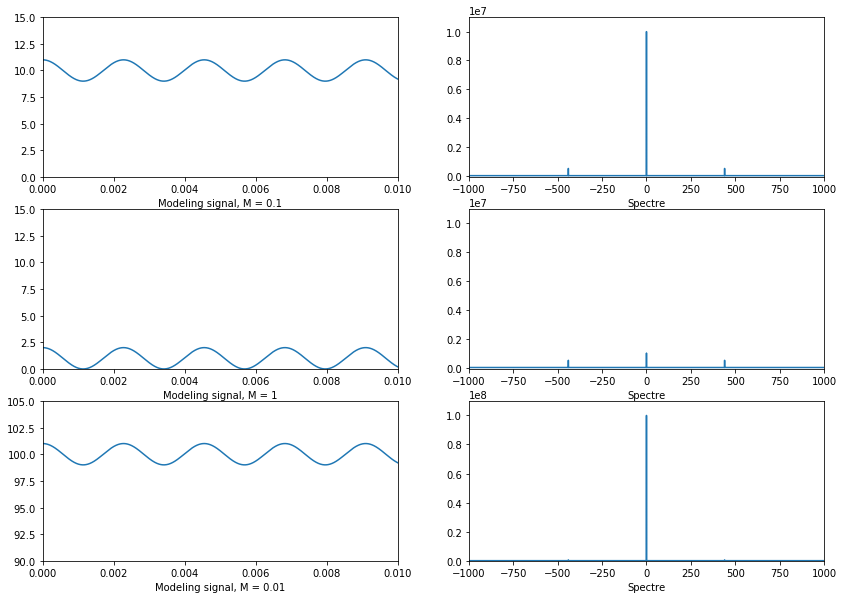

In [32]:
M = m_amp / carr_amp
mm_sig = carr_amp * (1 + M * m_sig)
plt.rcParams["figure.figsize"] = [14, 10]
plt.subplot(321)
plt.axis([0, 0.01, 0, 15])
plt.xlabel('Modeling signal, M = 0.1')
plt.plot(x, mm_sig)

n = len(mm_sig)
d = 1 / x.size
hs = np.fft.fft(mm_sig)
fs = np.fft.fftfreq(n, d)
hs = np.fft.fftshift(hs)
amps = np.abs(hs)
fs = np.fft.fftshift(fs)
plt.subplot(322)
plt.axis([-1000, 1000, -10**5, 1.1*10**7])
plt.xlabel('Spectre')
plt.plot(fs, amps)

M2 = m_amp / carr_amp2
mm_sig2 = carr_amp2 * (1 + M2 * m_sig)
plt.subplot(323)
plt.axis([0, 0.01, 0, 15])
plt.xlabel('Modeling signal, M = 1')
plt.plot(x, mm_sig2)

n = len(mm_sig2)
d = 1 / x.size
hs = np.fft.fft(mm_sig2)
fs = np.fft.fftfreq(n, d)
hs = np.fft.fftshift(hs)
amps = np.abs(hs)
fs = np.fft.fftshift(fs)
plt.subplot(324)
plt.axis([-1000, 1000, -10**5, 1.1*10**7])
plt.xlabel('Spectre')
plt.plot(fs, amps)

M3 = m_amp / carr_amp3
mm_sig3 = carr_amp3 * (1 + M3 * m_sig)
plt.subplot(325)
plt.axis([0, 0.01, 90, 105])
plt.xlabel('Modeling signal, M = 0.01')
plt.plot(x, mm_sig3)

n = len(mm_sig3)
d = 1 / x.size
hs = np.fft.fft(mm_sig3)
fs = np.fft.fftfreq(n, d)
hs = np.fft.fftshift(hs)
amps = np.abs(hs)
fs = np.fft.fftshift(fs)
plt.subplot(326)
plt.axis([-1000, 1000, -10**5, 1.1*10**8])
plt.xlabel('Spectre')
plt.plot(fs, amps)

eta1 = M**2 / (M**2 + 2)
eta2 = M2**2 / (M2**2 + 2)
eta3 = M3**2 / (M3**2 + 2)
print('{0:5}{1:0.2f}    {2:5}{3:0.3f}'.format('for M = ', M, "eta = ", eta1 * 100))
print('{0:5}{1:0.2f}    {2:5}{3:0.3f}'.format('for M = ', M2, "eta = ", eta2 * 100))
print('{0:5}{1:0.2f}    {2:5}{3:0.3f}'.format('for M = ', M3, "eta = ", eta3 * 100))

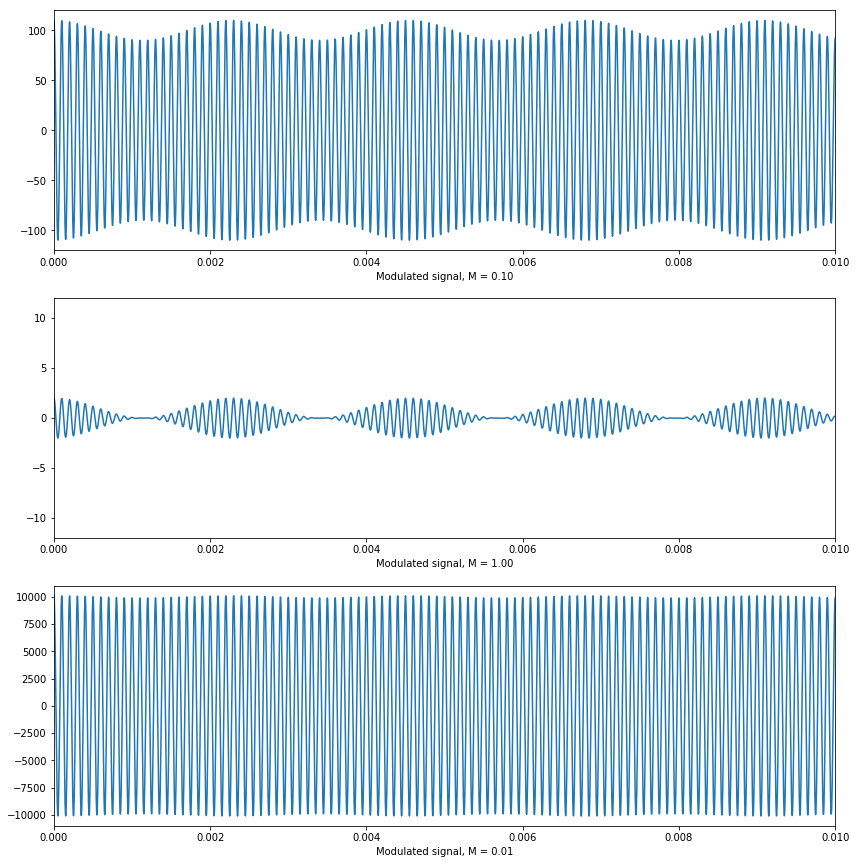

In [37]:
mod_sig = carr_amp * (1 + M * m_sig) * carr_sig
plt.rcParams["figure.figsize"] = [14, 15]
plt.subplot(3,1,1)
plt.axis([0, 0.01, -120, 120])
plt.xlabel('{0:10}{1:0.2f}'.format('Modulated signal, M = ', M))
plt.plot(x, mod_sig)

mod_sig2 = carr_amp2 * (1 + M2 * m_sig) * carr_sig2
plt.subplot(3,1,2)
plt.axis([0, 0.01, -12, 12])
plt.xlabel('{0:10}{1:0.2f}'.format('Modulated signal, M = ', M2))
plt.plot(x, mod_sig2)

mod_sig3 = carr_amp3 * (1 + M3 * m_sig) * carr_sig3
plt.subplot(3,1,3)
plt.axis([0, 0.01, -11000, 11000])
plt.xlabel('{0:10}{1:0.2f}'.format('Modulated signal, M = ', M3))
plt.plot(x, mod_sig3)

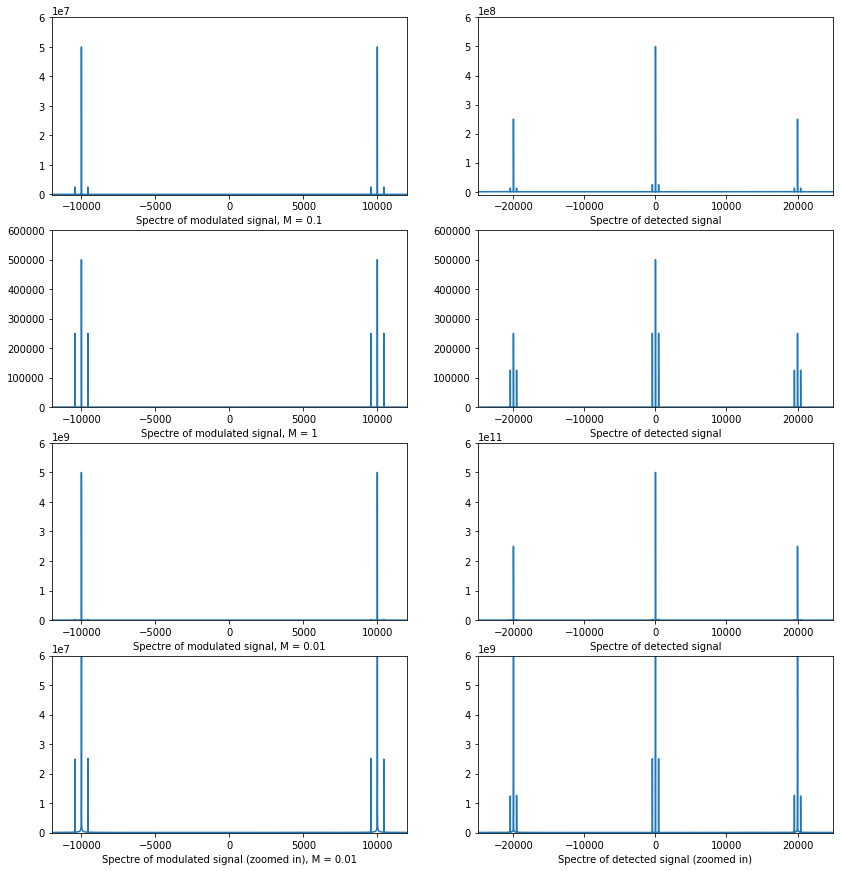

In [38]:
#Spectre of modulated signal
plt.rcParams["figure.figsize"] = [14, 15]
n = len(mod_sig)
d = 1 / x.size
hs = np.fft.fft(mod_sig)
fs = np.fft.fftfreq(n, d)
hs = np.fft.fftshift(hs)
amps = np.abs(hs)
fs = np.fft.fftshift(fs)
plt.subplot(4,2,1)
plt.xlabel('Spectre of modulated signal, M = 0.1')
plt.axis([-12000, 12000, -10**5, 6*10**7])
plt.plot(fs, amps)

#Signal detecting
dec_sig = mod_sig * carr_sig
n = len(dec_sig)
d = 1 / x.size
hs = np.fft.fft(dec_sig)
fs = np.fft.fftfreq(n, d)
hs = np.fft.fftshift(hs)
amps = np.abs(hs)
fs = np.fft.fftshift(fs)
plt.subplot(4,2,2)
plt.xlabel('Spectre of detected signal')
plt.axis([-25000, 25000, -10**7, 6*10**8])
plt.plot(fs, amps)

#Spectre of modulated signal2
n = len(mod_sig2)
d = 1 / x.size
hs = np.fft.fft(mod_sig2)
fs = np.fft.fftfreq(n, d)
hs = np.fft.fftshift(hs)
amps = np.abs(hs)
fs = np.fft.fftshift(fs)
plt.subplot(4,2,3)
plt.xlabel('Spectre of modulated signal, M = 1')
plt.axis([-12000, 12000, -10**3, 6*10**5])
plt.plot(fs, amps)

#Signal2 detecting
dec_sig2 = mod_sig2 * carr_sig2
n = len(dec_sig2)
d = 1 / x.size
hs = np.fft.fft(dec_sig2)
fs = np.fft.fftfreq(n, d)
hs = np.fft.fftshift(hs)
amps = np.abs(hs)
fs = np.fft.fftshift(fs)
plt.subplot(4,2,4)
plt.xlabel('Spectre of detected signal')
plt.axis([-25000, 25000, -10**3, 6*10**5])
plt.plot(fs, amps)

#Spectre of modulated signal3
n = len(mod_sig3)
d = 1 / x.size
hs = np.fft.fft(mod_sig3)
fs = np.fft.fftfreq(n, d)
hs = np.fft.fftshift(hs)
amps = np.abs(hs)
fs = np.fft.fftshift(fs)
plt.subplot(4,2,5)
plt.xlabel('Spectre of modulated signal, M = 0.01')
plt.axis([-12000, 12000, -10**5, 6 * 10**9])
plt.plot(fs, amps)
plt.subplot(4,2,7)
plt.xlabel('Spectre of modulated signal (zoomed in), M = 0.01')
plt.axis([-12000, 12000, -10**5, 6 * 10**7])
plt.plot(fs, amps)

#Signal3 detecting
dec_sig3 = mod_sig3 * carr_sig3
n = len(dec_sig3)
d = 1 / x.size
hs = np.fft.fft(dec_sig3)
fs = np.fft.fftfreq(n, d)
hs = np.fft.fftshift(hs)
amps = np.abs(hs)
fs = np.fft.fftshift(fs)
plt.subplot(4,2,6)
plt.xlabel('Spectre of detected signal')
plt.axis([-25000, 25000, -10**7, 6*10**11])
plt.plot(fs, amps)
plt.subplot(4,2,8)
plt.xlabel('Spectre of detected signal (zoomed in)')
plt.axis([-25000, 25000, -10**7, 6*10**9])
plt.plot(fs, amps)

#Амлитудная модуляция с подавлением несущей

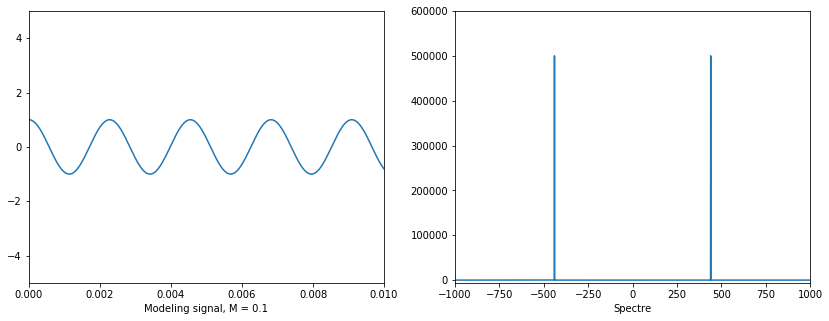

In [7]:
M = m_amp / carr_amp
mm_sig = carr_amp *  M * m_sig
plt.rcParams["figure.figsize"] = [14, 5]
plt.subplot(121)
plt.axis([0, 0.01, -5, 5])
plt.xlabel('Modeling signal, M = 0.1')
plt.plot(x, mm_sig)

n = len(mm_sig)
d = 1 / x.size
hs = np.fft.fft(mm_sig)
fs = np.fft.fftfreq(n, d)
hs = np.fft.fftshift(hs)
amps = np.abs(hs)
fs = np.fft.fftshift(fs)
plt.subplot(122)
plt.axis([-1000, 1000, 6*(-10**3), 6*10**5])
plt.xlabel('Spectre')
plt.plot(fs, amps)


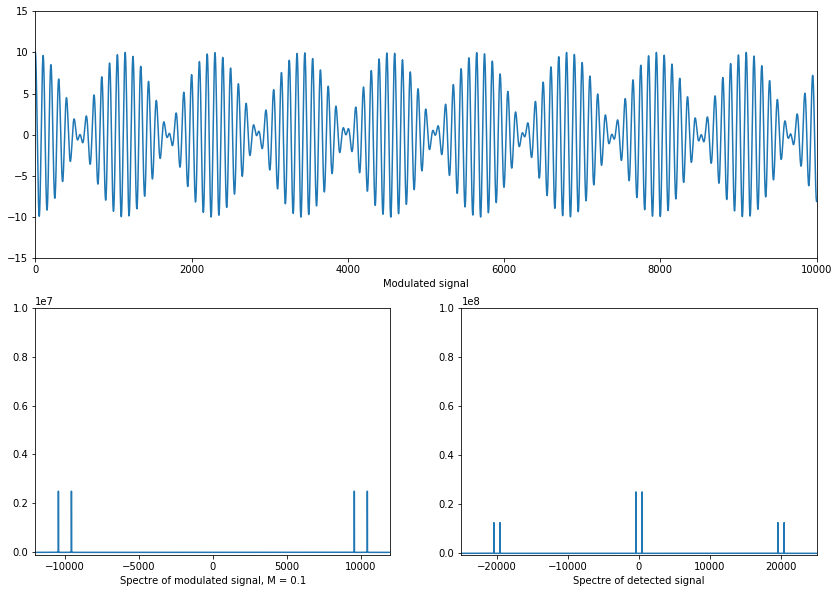

In [8]:
plt.rcParams["figure.figsize"] = [14, 10]
mod_sig = mm_sig * carr_sig
plt.subplot(2,1,1)
plt.axis([0, 10000, -15, 15])
plt.xlabel('Modulated signal')
plt.plot(mod_sig)

#Spectre of modulated signal
n = len(mod_sig)
d = 1 / x.size
hs = np.fft.fft(mod_sig)
fs = np.fft.fftfreq(n, d)
hs = np.fft.fftshift(hs)
amps = np.abs(hs)
fs = np.fft.fftshift(fs)
plt.subplot(2,2,3)
plt.xlabel('Spectre of modulated signal, M = 0.1')
plt.axis([-12000, 12000, -10**5, 10**7])
plt.plot(fs, amps)

#Signal detecting
dec_sig = mod_sig * carr_sig
n = len(dec_sig)
d = 1 / x.size
hs = np.fft.fft(dec_sig)
fs = np.fft.fftfreq(n, d)
hs = np.fft.fftshift(hs)
amps = np.abs(hs)
fs = np.fft.fftshift(fs)
plt.subplot(2,2,4)
plt.xlabel('Spectre of detected signal')
plt.axis([-25000, 25000, 6*-10**5, 10**8])
plt.plot(fs, amps)

#Однополосная амплитудная модуляция

In [10]:
#high band frequency
hb_freq = carr_freq + m_freq 

#low band frequency
lb_freq = carr_freq - m_freq 

ts = 2*np.pi * hb_freq * x
mhb_sig = m_amp * np.cos(ts)

ts = 2*np.pi * lb_freq * x
mlb_sig = m_amp * np.cos(ts)

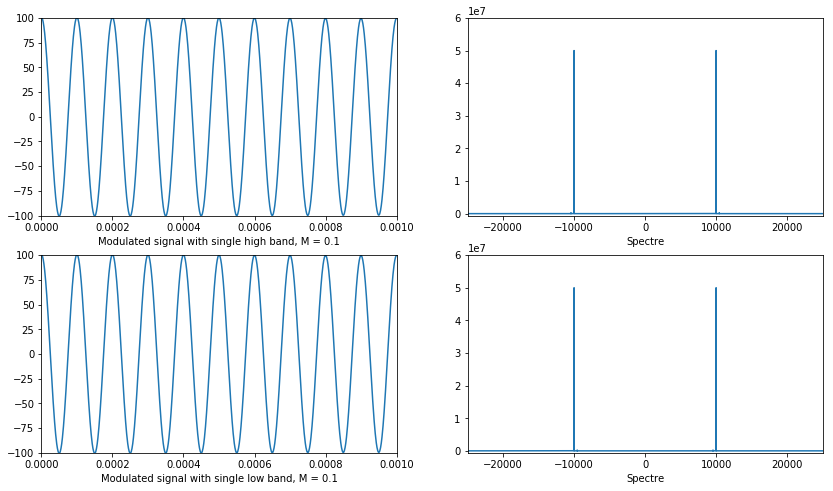

In [23]:
M = m_amp / carr_amp
mod_hb_sig = carr_amp * carr_sig + ((carr_amp * M) / 2) * mhb_sig
mod_lb_sig = carr_amp * carr_sig + ((carr_amp * M) / 2) * mlb_sig

plt.rcParams["figure.figsize"] = [14, 8]
plt.subplot(221)
plt.axis([0, 0.001, -100, 100])
plt.xlabel('Modulated signal with single high band, M = 0.1')
plt.plot(x, mod_hb_sig)

n = len(mod_hb_sig)
d = 1 / x.size
hs = np.fft.fft(mod_hb_sig)
fs = np.fft.fftfreq(n, d)
hs = np.fft.fftshift(hs)
amps = np.abs(hs)
fs = np.fft.fftshift(fs)
plt.subplot(222)
plt.axis([-25000, 25000, 6*(-10**5), 6*10**7])
plt.xlabel('Spectre')
plt.plot(fs, amps)

plt.subplot(223)
plt.axis([0, 0.001, -100, 100])
plt.xlabel('Modulated signal with single low band, M = 0.1')
plt.plot(x, mod_lb_sig)

n = len(mod_lb_sig)
d = 1 / x.size
hs = np.fft.fft(mod_lb_sig)
fs = np.fft.fftfreq(n, d)
hs = np.fft.fftshift(hs)
amps = np.abs(hs)
fs = np.fft.fftshift(fs)
plt.subplot(224)
plt.axis([-25000, 25000, 6*(-10**5), 6*10**7])
plt.xlabel('Spectre')
plt.plot(fs, amps)

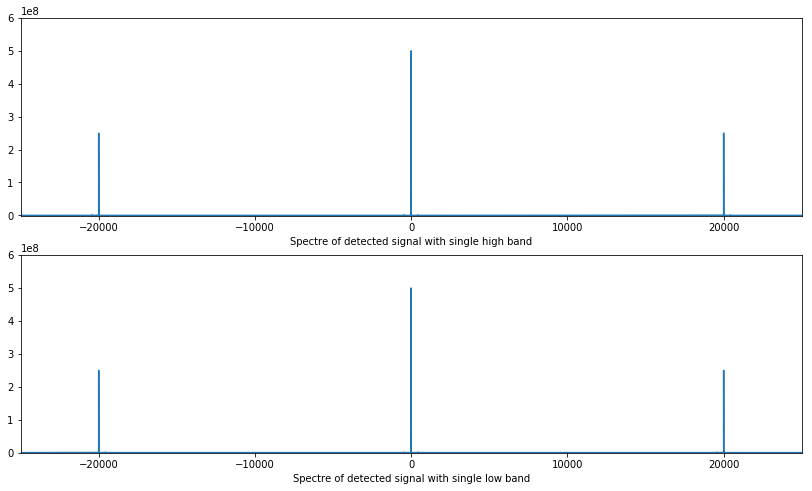

In [24]:
dec_sig_hb = mod_hb_sig * carr_sig
dec_sig_lb = mod_lb_sig * carr_sig

plt.rcParams["figure.figsize"] = [14, 8]
n = len(dec_sig_hb)
d = 1 / x.size
hs = np.fft.fft(dec_sig_hb)
fs = np.fft.fftfreq(n, d)
hs = np.fft.fftshift(hs)
amps = np.abs(hs)
fs = np.fft.fftshift(fs)
plt.subplot(2,1,1)
plt.xlabel('Spectre of detected signal with single high band')
plt.axis([-25000, 25000, 6*-10**5, 6 * 10**8])
plt.plot(fs, amps)

n = len(dec_sig_lb)
d = 1 / x.size
hs = np.fft.fft(dec_sig_lb)
fs = np.fft.fftfreq(n, d)
hs = np.fft.fftshift(hs)
amps = np.abs(hs)
fs = np.fft.fftshift(fs)
plt.subplot(2,1,2)
plt.xlabel('Spectre of detected signal with single low band')
plt.axis([-25000, 25000, 6*-10**5, 6 * 10**8])
plt.plot(fs, amps)